In [186]:
!pip install yfinance

In [187]:
import yfinance as yf
import pandas as pd
import os

In [188]:

# Liste des symboles des actions à sélectionner
stock_symbols = ['AAPL']
stock_symbols_all = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA']


In [189]:
def fetch_portfolio(stock):
    pf_final = pd.DataFrame()
    pf_final = yf.Ticker(stock)
    pf_final = pf_final.history(period="max")
    return pf_final

In [190]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [191]:
def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    
    return pd.concat(all_predictions) # Concatenate a list of dataframes into a dataframe

In [192]:
def plot_ticker_list (stock_list):
    for stock in stock_list:
        portfoliotemp = fetch_portfolio(stock)
        portfoliotemp.index = pd.to_datetime(portfoliotemp.index)
        portfoliotemp.plot.line(y="Close", use_index=True, label=stock)
        portfoliotemp = None


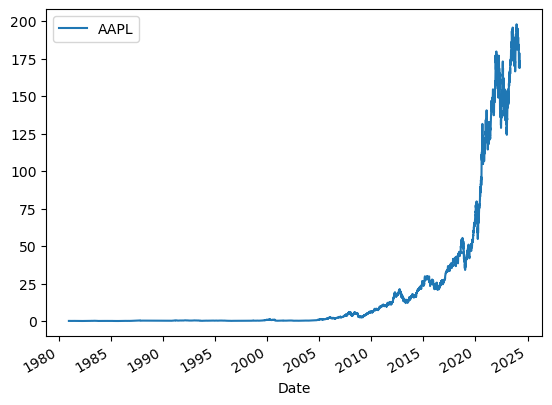

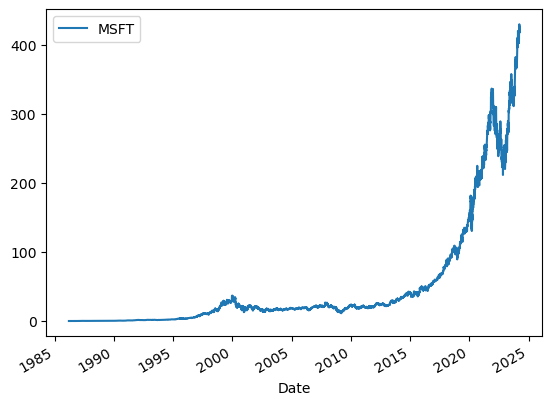

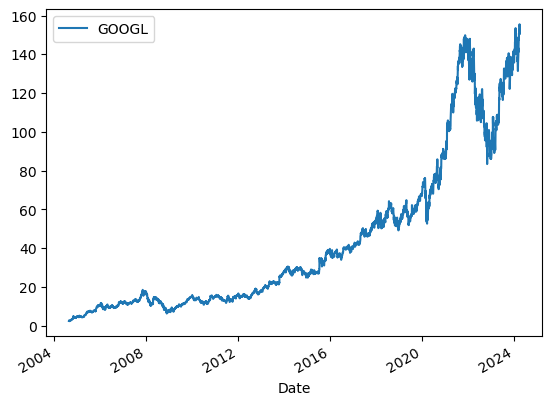

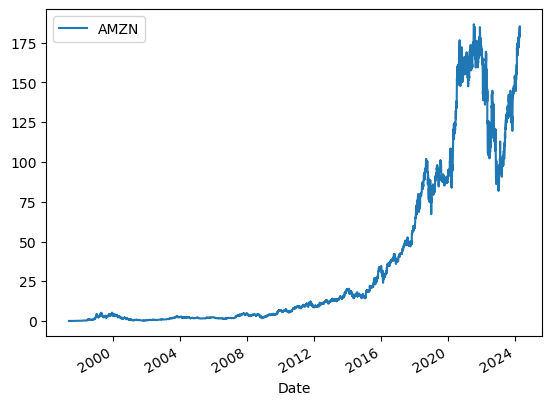

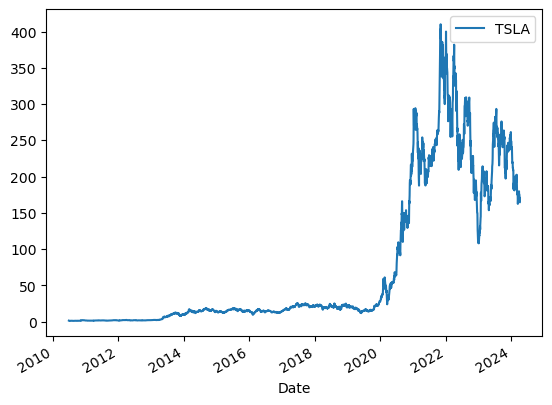

In [193]:
plot_ticker_list(stock_symbols_all)

In [194]:

portfolio01 = fetch_portfolio(stock_symbols_all[0])

In [195]:
# We get more than 10,000 records depending on when the Stock was created. Each row relates to one trading day
# We are not going to use the Dividends and Stock Splits to keep things simple. If Splits is on our way, we will assess the changes
# We are going to use the columns [ 'Open', 'High', 'Low', 'Close', 'Volume'] to predict whether the price of the stock will go up or down the following day

portfolio01

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-12-12 00:00:00-05:00,0.099192,0.099623,0.099192,0.099192,469033600,0.0,0.0
1980-12-15 00:00:00-05:00,0.094448,0.094448,0.094017,0.094017,175884800,0.0,0.0
1980-12-16 00:00:00-05:00,0.087548,0.087548,0.087116,0.087116,105728000,0.0,0.0
1980-12-17 00:00:00-05:00,0.089273,0.089704,0.089273,0.089273,86441600,0.0,0.0
1980-12-18 00:00:00-05:00,0.091861,0.092292,0.091861,0.091861,73449600,0.0,0.0
...,...,...,...,...,...,...,...
2024-04-01 00:00:00-04:00,171.190002,171.250000,169.479996,170.029999,46240500,0.0,0.0
2024-04-02 00:00:00-04:00,169.080002,169.339996,168.229996,168.839996,49329500,0.0,0.0
2024-04-03 00:00:00-04:00,168.789993,170.679993,168.580002,169.649994,47602100,0.0,0.0


In [196]:
# If there is a stock split, we will have to interact or change the scope of the time study
del portfolio01["Dividends"]
del portfolio01["Stock Splits"]

In [197]:
# Let's take the value of the following closing day and to build a True/False Target variable on the current day
# This is how we are going to qualify a day as being a good day to invest or not
portfolio01["Tomorrow"] = portfolio01["Close"].shift(-1)
portfolio01["Target"] = (portfolio01["Tomorrow"] > portfolio01["Close"]).astype(int)

In [198]:
portfolio01

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1980-12-12 00:00:00-05:00,0.099192,0.099623,0.099192,0.099192,469033600,0.094017,0
1980-12-15 00:00:00-05:00,0.094448,0.094448,0.094017,0.094017,175884800,0.087116,0
1980-12-16 00:00:00-05:00,0.087548,0.087548,0.087116,0.087116,105728000,0.089273,1
1980-12-17 00:00:00-05:00,0.089273,0.089704,0.089273,0.089273,86441600,0.091861,1
1980-12-18 00:00:00-05:00,0.091861,0.092292,0.091861,0.091861,73449600,0.097467,1
...,...,...,...,...,...,...,...
2024-04-01 00:00:00-04:00,171.190002,171.250000,169.479996,170.029999,46240500,168.839996,0
2024-04-02 00:00:00-04:00,169.080002,169.339996,168.229996,168.839996,49329500,169.649994,1
2024-04-03 00:00:00-04:00,168.789993,170.679993,168.580002,169.649994,47602100,168.820007,0


In [199]:
# Making a new Portfolio choosing a start date until today
portfolio01 = portfolio01.loc["1990-01-01":].copy()

We are going to use RandomForestClassifier. It runs several DecisionTrees algorithms with randomized parameters and average the results<br>
It does not overfit as much. It picks non linear relationships, which caracterize Trading data<br>
min_ samples_split not too high to prevent Decition Trees to go too deep, and overfit<br>
We cannot use cross validation with time series type of data, otherwise we would be leaking information

In [200]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

train = portfolio01.iloc[:-100]
test = portfolio01.iloc[-100:]

predictors = ["Close", "Volume", "Open", "High", "Low"]
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [201]:
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])
preds = pd.Series(preds, index=test.index)
precision_score(test["Target"], preds)

0.4745762711864407

That's a predict bad model to predict. Looks like we would be losing money

<Axes: xlabel='Date'>

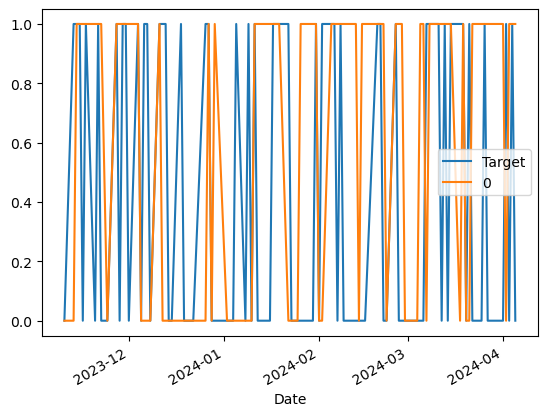

In [202]:
combined = pd.concat([test["Target"], preds], axis=1)
combined.plot()

We are going to trigger the model on the historical data, going back 10 years and evaluating the result for the following year<br>
Take 11 years of data, and predict for the following year...

In [203]:
predictions = backtest(portfolio01, model, predictors)

Numbers of predictions that market will go up or down

In [204]:
predictions["Predictions"].value_counts()

Predictions
0    4185
1    1946
Name: count, dtype: int64

In [205]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5149023638232272

Actual behavior of the Stock to compare to our prediction. Better off waking up and investing each day

In [206]:
predictions["Target"].value_counts() / predictions.shape[0]

Target
1    0.520307
0    0.479693
Name: count, dtype: float64

We are going to add as predictors, the information regarding the stock value 2 days ago, a week, 3 months and 4 years<br>
The rolling method is useful calculating moving averages or other rolling window calculations in time series data or any sequential data

In [207]:
horizons = [2,5,60,250,1000]
new_predictors = []

for horizon in horizons:
    rolling_averages = portfolio01.rolling(horizon).mean()
    
    ratio_column = f"Close_Ratio_{horizon}"
    portfolio01[ratio_column] = portfolio01["Close"] / rolling_averages["Close"]
    
    trend_column = f"Trend_{horizon}"
    portfolio01[trend_column] = portfolio01.shift(1).rolling(horizon).sum()["Target"]
    
    new_predictors+= [ratio_column, trend_column]

Drop the NaN values from the dataframe<br>
Note: this will dramatically reduce the number of rows because of the rolling computation over 4 years

In [208]:
portfolio01.shape

(8631, 17)

In [209]:
portfolio01 = portfolio01.dropna(subset=portfolio01.columns[portfolio01.columns != "Tomorrow"])

In [210]:
portfolio01

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1993-12-14 00:00:00-05:00,0.215566,0.219251,0.213724,0.214645,293664000,0.219251,1,0.993604,1.0,0.978993,1.0,1.007241,22.0,0.694753,111.0,0.637248,462.0
1993-12-15 00:00:00-05:00,0.213724,0.219251,0.213724,0.219251,123883200,0.216488,0,1.010615,1.0,1.014493,2.0,1.025699,23.0,0.711547,111.0,0.651010,462.0
1993-12-16 00:00:00-05:00,0.217409,0.219251,0.213724,0.216488,126369600,0.217409,1,0.993658,1.0,1.005993,2.0,1.010467,22.0,0.704569,110.0,0.642898,461.0
1993-12-17 00:00:00-05:00,0.217409,0.219251,0.214645,0.217409,145152000,0.210039,0,1.002123,1.0,1.001698,3.0,1.011960,23.0,0.709636,110.0,0.645728,461.0
1993-12-20 00:00:00-05:00,0.215567,0.219251,0.208196,0.210039,189033600,0.202669,0,0.982758,1.0,0.974358,2.0,0.975652,22.0,0.687599,110.0,0.623946,460.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-01 00:00:00-04:00,171.190002,171.250000,169.479996,170.029999,46240500,168.839996,0,0.995754,0.0,0.993886,1.0,0.937166,24.0,0.941749,125.0,1.160676,522.0
2024-04-02 00:00:00-04:00,169.080002,169.339996,168.229996,168.839996,49329500,169.649994,1,0.996488,0.0,0.989254,1.0,0.931706,24.0,0.935084,124.0,1.151739,521.0
2024-04-03 00:00:00-04:00,168.789993,170.679993,168.580002,169.649994,47602100,168.820007,0,1.002393,1.0,0.994070,2.0,0.937149,25.0,0.939468,125.0,1.156452,521.0


In [211]:
portfolio01.shape

(7631, 17)

In [212]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

Let's consider that if the probability of the price of the stock goes up is greater than 0.6 instead of 0.5 the default

In [213]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:,1]
    preds[preds >=.6] = 1
    preds[preds <.6] = 0
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

We are going to trade of fewer days

In [214]:
# Using new predictors
new_predictors

['Close_Ratio_2',
 'Trend_2',
 'Close_Ratio_5',
 'Trend_5',
 'Close_Ratio_60',
 'Trend_60',
 'Close_Ratio_250',
 'Trend_250',
 'Close_Ratio_1000',
 'Trend_1000']

In [215]:
predictions = backtest(portfolio01, model, new_predictors)

In [216]:
predictions["Predictions"].value_counts()

Predictions
0.0    4582
1.0     549
Name: count, dtype: int64

In [217]:
predictions

,Target,Predictions
Date,,
2003-11-14 00:00:00-05:00,0,0.0
2003-11-17 00:00:00-05:00,0,0.0
2003-11-18 00:00:00-05:00,1,0.0
2003-11-19 00:00:00-05:00,0,0.0
2003-11-20 00:00:00-05:00,0,0.0
...,...,...
2024-04-01 00:00:00-04:00,0,0.0
2024-04-02 00:00:00-04:00,1,0.0
2024-04-03 00:00:00-04:00,0,0.0


In [218]:
score = precision_score(predictions["Target"], predictions["Predictions"])

In [219]:
score

0.5264116575591985

In [220]:
predictions["Target"].value_counts() / predictions.shape[0]

Target
1    0.528942
0    0.471058
Name: count, dtype: float64